In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data=data.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })
data.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

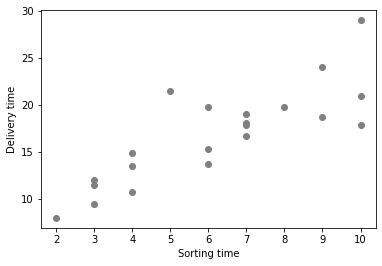

In [5]:
plt.scatter(x=data.st, y=data.dt, color='grey')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x1b988b1f670>,
 'caps': [<matplotlib.lines.Line2D at 0x1b988b1fd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b988b1f310>],
 'medians': [<matplotlib.lines.Line2D at 0x1b988b2e430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b988b2e790>],
 'means': []}

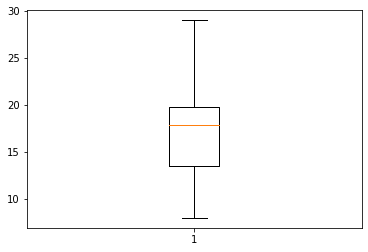

In [6]:
plt.boxplot(data.dt)

(array([3., 5., 5., 6., 1., 1.]),
 array([ 8. , 11.5, 15. , 18.5, 22. , 25.5, 29. ]),
 <BarContainer object of 6 artists>)

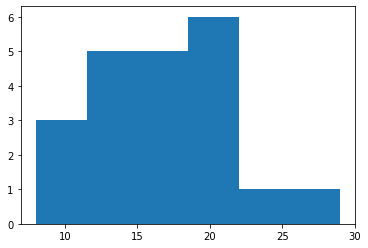

In [7]:
plt.hist(data.dt, bins=6)

In [8]:
model2=smf.ols("dt~st",data=data).fit()

In [9]:
model2.params

Intercept    6.582734
st           1.649020
dtype: float64

In [10]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        15:44:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model2.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [12]:
model3=smf.ols("dt~np.log(st)",data=data).fit()

In [13]:
model3.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [14]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.64e-06
Time:                        15:44:32   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model2.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [16]:
model3.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [17]:
pred2 = model2.predict(data)

In [18]:
pred3 = model3.predict(data)

Text(0, 0.5, 'Delivery time')

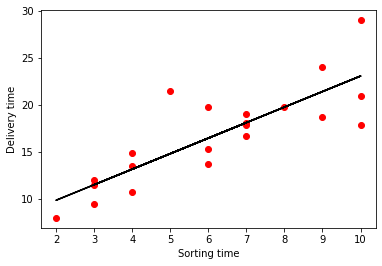

In [19]:
plt.scatter(x=data.st, y=data.dt, color='RED')
plt.plot(data.st, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

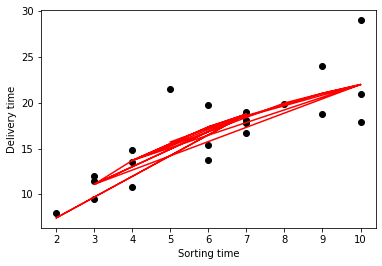

In [20]:
plt.scatter(x=data.st, y=data.dt, color='black')
plt.plot(data.st, pred3,color='red')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")